# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint 
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporate citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = '/Users/rollycostillas/Desktop/upenn/homework/myrepository/python-api-challenge/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
lat_lngs_list = list(lat_lngs)

# print number of cities in the final list
print(len(cities))

602


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"

#Define empty lists to store values
cloudiness = []
country = []
date = []
max_temp = []
humidity = []
lat = []
lng = []
wind_speed = []
city_name = []

#Looping through cities to make api calls using city as query
i = 1
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
#Extracting data. Missing data is handled by try and except  
    try:
        
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        max_temp.append(response["main"]['temp_max'])
        humidity.append(response["main"]['humidity'])
        lat.append(response["coord"]["lat"])  
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_name.append(response["name"])
        print(f"City {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found. skipping.")
        

City not found. skipping.
City 1|busselton
City 2|asau
City 3|jiuquan
City 4|butaritari
City 5|port lincoln
City 6|lasa
City 7|pedernales
City not found. skipping.
City 8|changji
City not found. skipping.
City 9|hithadhoo
City 10|qaanaaq
City 11|kodiak
City 12|ushuaia
City 13|vila velha
City 14|mahebourg
City 15|ulladulla
City 16|bengkulu
City 17|yulara
City 18|kapaa
City 19|tuktoyaktuk
City 20|biltine
City 21|la ronge
City 22|rikitea
City 23|carnarvon
City 24|anshan
City 25|cam ranh
City 26|rio grande
City 27|hirado
City 28|namatanai
City 29|thompson
City 30|tura
City 31|albany
City 32|kieta
City 33|vaini
City 34|cayenne
City 35|punta arenas
City 36|colares
City 37|castro
City 38|provideniya
City 39|abaete
City 40|sur
City 41|nueve de julio
City 42|jamestown
City 43|hermanus
City 44|tias
City 45|yellowknife
City 46|vao
City 47|chokurdakh
City 48|buala
City 49|severodvinsk
City 50|termoli
City 51|faanui
City 52|arraial do cabo
City 53|tasiilaq
City 54|saint-philippe
City 55|mantua
City

City 403|turayf
City 404|alice springs
City 405|trelew
City 406|emporia
City 407|hambantota
City 408|arbazh
City 409|gilbues
City not found. skipping.
City 410|college
City 411|pacific grove
City 412|mahajanga
City 413|sokolo
City 414|channel-port aux basques
City 415|samfya
City 416|herat
City 417|jiangyou
City 418|elizabeth city
City 419|surin
City 420|comodoro rivadavia
City 421|stephenville
City 422|elko
City 423|mitsamiouli
City 424|hemsedal
City 425|pangnirtung
City 426|demyansk
City 427|gold coast
City 428|opuwo
City 429|dakar
City 430|sabang
City 431|boma
City 432|armilla
City 433|ensenada
City 434|udachnyy
City 435|quatre cocos
City 436|oksbol
City not found. skipping.
City 437|aykhal
City 438|oktyabrskoye
City 439|yamada
City 440|iskateley
City 441|marawi
City 442|jacareacanga
City 443|solnechnyy
City 444|waldoboro
City 445|sao jose da coroa grande
City 446|arroyo grande
City 447|kupang
City 448|seoul
City 449|moree
City 450|kaeo
City 451|wahiawa
City 452|lazaro cardenas
City

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# create dataframe with data generated from API calls
city_df = pd.DataFrame({"City":city_name, 
                        "Cloudiness":cloudiness, 
                        "Country":country, 
                        "Date":date, 
                        "Humidity":humidity,
                        "Lat":lat,
                        "Lng":lng,
                        "Max Temp":max_temp,
                        "Wind Speed":wind_speed
                                         })
city_df = city_df.rename_axis('City ID')

# output dataframe to csv file
city_df.to_csv('/Users/rollycostillas/Desktop/upenn/homework/myrepository/python-api-challenge/cities.csv')

#Displaying dataframe
city_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
City ID,,,,,,,,,
0,Busselton,0,AU,1651779819,62,-33.6500,115.3333,54.70,13.58
1,Asău,12,RO,1651780099,83,46.4333,26.4000,49.28,0.78
2,Jiuquan,64,CN,1651780099,29,39.7432,98.5174,59.14,11.05
3,Butaritari,66,KI,1651779846,71,3.0707,172.7902,81.50,17.13
4,Port Lincoln,89,AU,1651779898,58,-34.7333,135.8667,56.01,10.47
...,...,...,...,...,...,...,...,...,...
550,Manggar,89,ID,1651780255,78,-2.8833,108.2667,80.87,2.59
551,Vanimo,99,PG,1651780256,90,-2.6741,141.3028,77.45,4.18
552,Ponnāni,100,IN,1651780256,83,10.7670,75.9252,81.72,1.77


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
# inspect the basic statistical values of the dataframe, paying attention to make sure no max humidity over 100
city_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,555.000000,5.550000e+02,555.000000,555.000000,555.000000,555.000000,555.000000
mean,53.045045,1.651780e+09,69.814414,18.703720,18.054391,63.187279,8.288901
std,40.214584,1.586606e+02,21.471494,33.725574,90.711986,19.354513,5.246391
min,0.000000,1.651780e+09,1.000000,-54.800000,-175.200000,4.480000,0.000000
25%,9.000000,1.651780e+09,59.000000,-9.815850,-60.758200,51.755000,4.350000
50%,60.000000,1.651780e+09,75.000000,21.426700,23.750000,66.510000,7.180000
75%,98.000000,1.651780e+09,85.500000,47.214750,95.725350,78.770000,11.500000
max,100.000000,1.651780e+09,100.000000,78.218600,179.316700,99.410000,28.770000


In [6]:
# get the indices of cities that have humidity over 100%
bad_data = []

# if any cities have humidity over 100%, print the index values of those lines
if city_df["Humidity"].max() > 100:
    bad_data = city_df.loc[city_df["Humidity"]>100, :].index.values
    print(bad_data)

In [7]:
# create new dataframe while dropping humidity outliers by index value
clean_city_df = city_df.drop(bad_data, inplace=False)
clean_city_df.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,555.000000,5.550000e+02,555.000000,555.000000,555.000000,555.000000,555.000000
mean,53.045045,1.651780e+09,69.814414,18.703720,18.054391,63.187279,8.288901
std,40.214584,1.586606e+02,21.471494,33.725574,90.711986,19.354513,5.246391
min,0.000000,1.651780e+09,1.000000,-54.800000,-175.200000,4.480000,0.000000
25%,9.000000,1.651780e+09,59.000000,-9.815850,-60.758200,51.755000,4.350000
50%,60.000000,1.651780e+09,75.000000,21.426700,23.750000,66.510000,7.180000
75%,98.000000,1.651780e+09,85.500000,47.214750,95.725350,78.770000,11.500000
max,100.000000,1.651780e+09,100.000000,78.218600,179.316700,99.410000,28.770000


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

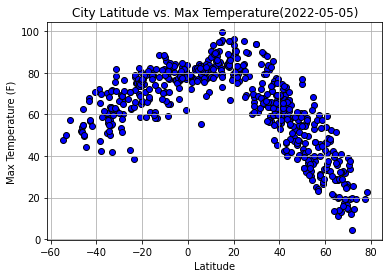

In [8]:
#Converting Date for title of plot
timestamp = clean_city_df["Date"][0]
converted_timestamp = datetime.utcfromtimestamp(timestamp)
shortened_timestamp = datetime.date(converted_timestamp)

#Creating plot
plt.scatter(clean_city_df["Lat"], clean_city_df["Max Temp"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature({shortened_timestamp})")
plt.savefig("..//WeatherPy/output_data/Fig01-Lat_vs_Temp.png")
plt.show()

The illustration above demonstrates that there is a relationship between Latitude and Max Temp. Places closer to the equator (Latitude=0) experience extreme temperature at its peak, then as it move towards the pole temperature decreases gradually.

## Latitude vs. Humidity Plot

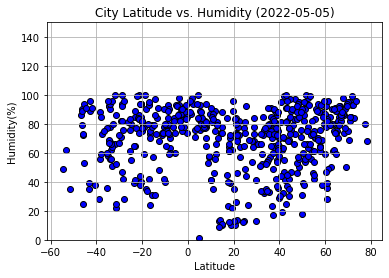

In [9]:
plt.scatter(clean_city_df["Lat"], clean_city_df["Humidity"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.ylim(0, clean_city_df["Humidity"].max()+50)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title(f"City Latitude vs. Humidity ({shortened_timestamp})")
plt.savefig("..//WeatherPy/output_data/Fig02-Lat_vs_Humidity.png")
plt.show()

The illustration above does not appear to have a relationship between Latitude and Humidity.

## Latitude vs. Cloudiness Plot

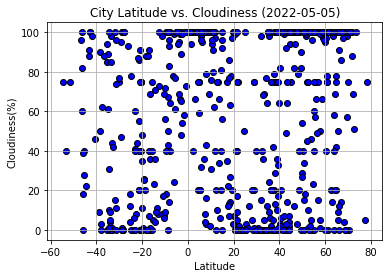

In [10]:
plt.scatter(clean_city_df["Lat"], clean_city_df["Cloudiness"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latitude vs. Cloudiness ({shortened_timestamp})")
plt.savefig("..//WeatherPy/output_data/Fig03-Lat_vs_Cloudiness.png")
plt.show()

The illustration above does not appear to have a relationship between Latitude and Cloudiness.

## Latitude vs. Wind Speed Plot

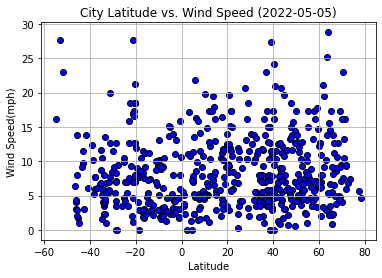

In [11]:
plt.scatter(clean_city_df["Lat"], clean_city_df["Wind Speed"], marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title(f"City Latitude vs. Wind Speed ({shortened_timestamp})")
plt.savefig("..//WeatherPy/output_data/Fig04-Lat_vs_Windspeed.png")
plt.show()

The illustration above does not appear to have a relationship between Latitude and Wind Speed.

## Linear Regression

In [12]:
# create new DataFrames that only contain northern and southern hemisphere data, respectively
Northern_Hemisphere = clean_city_df.loc[clean_city_df["Lat"]>=0]
Southern_Hemisphere = clean_city_df.loc[clean_city_df["Lat"]<0]

In [13]:
# function to generate hemisphere scatter plots with linear regressions
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8693405129795497


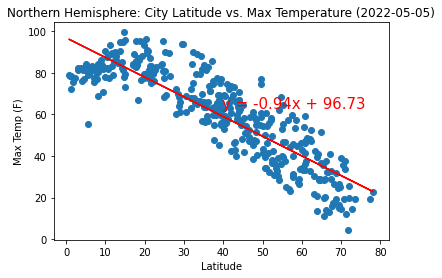

In [14]:
# call function to print Lat vs Temp scatter & linear regression for Northern Hemisphere
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
plt.title(f"Northern Hemisphere: City Latitude vs. Max Temperature ({shortened_timestamp})")
plt.savefig("..//WeatherPy/output_data/Fig05-NorthHem_CityLat_vs_MaxTemp.png")
linear_reg_plot(x_values,y_values)
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6966436737371844


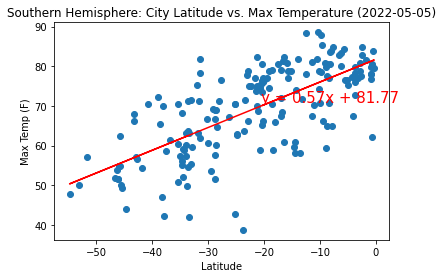

In [15]:
# call function to print Lat vs Temp scatter & linear regression for Southern Hemisphere
x_values = Southern_Hemisphere["Lat"]
y_values = Southern_Hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
plt.title(f"Southern Hemisphere: City Latitude vs. Max Temperature ({shortened_timestamp})")
plt.savefig("..//WeatherPy/output_data/Fig06-SouthHem_CityLat_vs_MaxTemp.png")
linear_reg_plot(x_values,y_values)
plt.show()

Maximum Temperature vs. Latitude Analysis

In the Northern Hemisphere, the r-value (-0.85) shows a moderate negative correlation between latitude and max temperature which means that places in higher latitude experience drop in the maximum temperature. The data points are concentrated around the regression line. While in the Southern Hemisphere, the r-value (0.73) demonstrates a strong, positive relationship between latitude and max temperature, where the same observation is similar, the data points are scattered around the regression line.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.19143652913349463


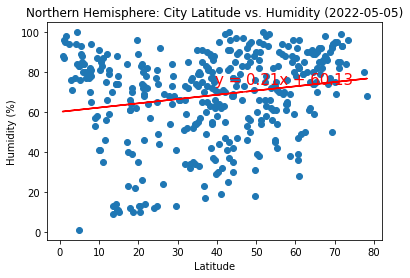

In [16]:
# call function to print Lat vs Humidity scatter & linear regression for Northern Hemisphere
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Humidity"]
plt.ylabel("Humidity (%)")
plt.title(f"Northern Hemisphere: City Latitude vs. Humidity ({shortened_timestamp})")
plt.savefig("..//WeatherPy/output_data/Fig07-NorthHem_CityLat_vs_Humidity.png")
linear_reg_plot(x_values,y_values)
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.21419577993533784


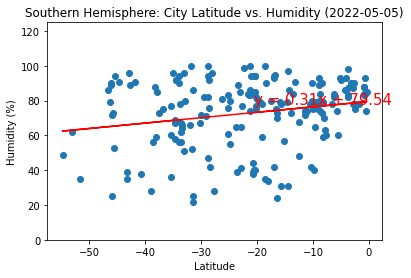

In [17]:
# call function to print Lat vs Humidity scatter & linear regression for Southern Hemisphere
x_values = Southern_Hemisphere["Lat"]
y_values = Southern_Hemisphere["Humidity"]
plt.ylim(0, y_values.max()+25)
plt.ylabel("Humidity (%)")
plt.title(f"Southern Hemisphere: City Latitude vs. Humidity ({shortened_timestamp})")
plt.savefig("..//WeatherPy/output_data/Fig08-SouthHem_CityLat_vs_Humidity.png")
linear_reg_plot(x_values,y_values)
plt.show()

Humidity vs. Latitude Analysis

In both the Northern and Southern Hemispheres, the r-values demonstrate a weak relationship between latitude and humidity which means that there is no evidence to support a relationship between proximity to the equator and humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1123310124316784


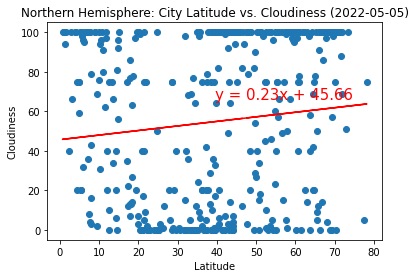

In [18]:
# call function to print Lat vs Cloudiness scatter & linear regression for Northern Hemisphere
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
plt.title(f"Northern Hemisphere: City Latitude vs. Cloudiness ({shortened_timestamp})")
plt.savefig("..//WeatherPy/output_data/Fig09-NorthHem_CityLat_vs_Cloudiness.png")
linear_reg_plot(x_values,y_values)
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.17357799887267866


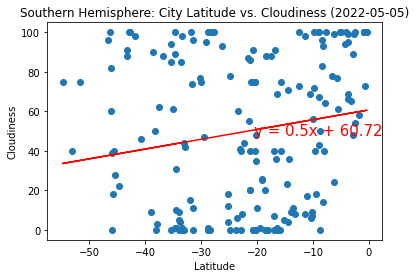

In [19]:
# call function to print Lat vs Cloudiness scatter & linear regression for Southern Hemisphere
x_values = Southern_Hemisphere["Lat"]
y_values = Southern_Hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
plt.title(f"Southern Hemisphere: City Latitude vs. Cloudiness ({shortened_timestamp})")
plt.savefig("..//WeatherPy/output_data/Fig10-SouthHem_CityLat_vs_Cloudiness.png")
linear_reg_plot(x_values,y_values)
plt.show()

Cloudiness vs. Latitude Analysis

In both the Northern and Southern Hemispheres, the r-values demonstrate a weak relationship between latitude and cloudiness which means that there is no evidence to support a relationship between proximity to the equator and cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03810307162499971


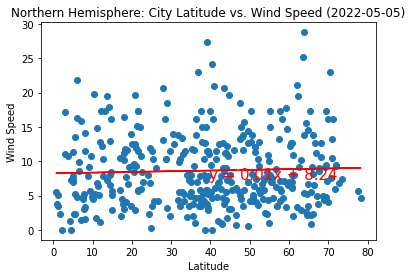

In [20]:
# call function to print Lat vs Wind Speed scatter & linear regression for Northern Hemisphere
x_values = Northern_Hemisphere["Lat"]
y_values = Northern_Hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
plt.title(f"Northern Hemisphere: City Latitude vs. Wind Speed ({shortened_timestamp})")
plt.savefig("..//WeatherPy/output_data/Fig11-NorthHem_CityLat_vs_WindSpeed.png")
linear_reg_plot(x_values,y_values)
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.11999377111211984


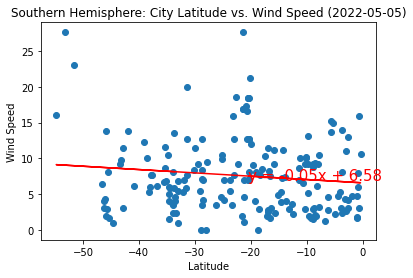

In [21]:
# call function to print Lat vs Wind Speed scatter & linear regression for Southern Hemisphere
x_values = Southern_Hemisphere["Lat"]
y_values = Southern_Hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
plt.title(f"Southern Hemisphere: City Latitude vs. Wind Speed ({shortened_timestamp})")
plt.savefig("..//WeatherPy/output_data/Fig12-SouthHem_CityLat_vs_WindSpeed.png")
linear_reg_plot(x_values,y_values)
plt.show()

Wind Speed vs. Latitude Analysis

In both the Northern and Southern Hemispheres, the r-values demonstrate a weak relationship between latitude and wind speed which means that there is no evidence to support a relationship between proximity to the equator and wind speed.